In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from wordcloud import WordCloud 

# Load the dataset 

In [2]:
data = pd.read_csv("spam.csv",encoding='latin1')

# Perform EDA 

## Display the first few rows of the dataset 

In [3]:
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


# Summary statistics of the dataset

In [5]:
print(data.describe()) 

          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


# Check for missing values
 

In [6]:
print(data.isnull().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


# Data Visualization 

## Count plot of spam vs. ham emails

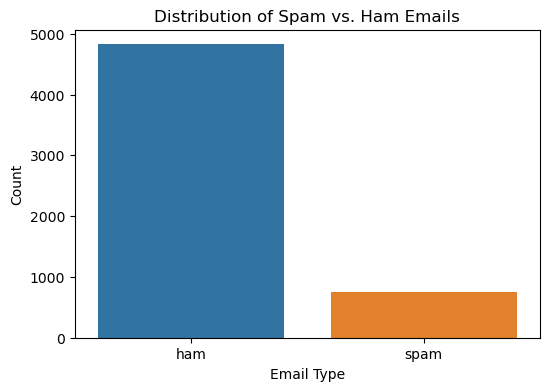

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='v1')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam vs. Ham Emails')
plt.show()

# Word cloud of spam emails 

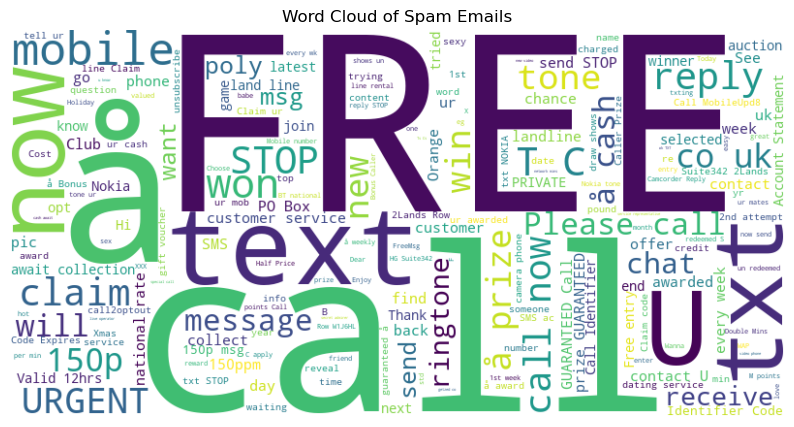

In [8]:
spam_emails = data[data['v1'] == 'spam']['v2']
spam_text = " ".join(email for email in spam_emails)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Emails')
plt.show()

# Bar plot of most frequent words in spam emails 

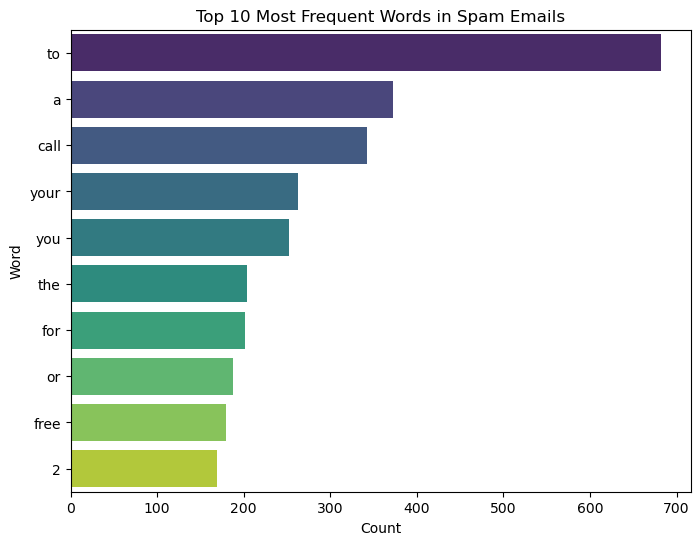

In [9]:
spam_words = pd.Series(' '.join(spam_emails).lower().split())
spam_word_counts = spam_words.value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=spam_word_counts.values, y=spam_word_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 10 Most Frequent Words in Spam Emails')
plt.show()

#  Model Building

## Prepare the data  

In [10]:
X = data['v2']
y = data['v1']

# Split the data into training and testing sets 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data 

In [12]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Random Forest Classifier 

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model evaluation

## Make predictions on the test set  

In [14]:
y_pred = model.predict(X_test)

# Model accuracy evaluation 

In [15]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [16]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9757847533632287
Confusion Matrix:
[[965   0]
 [ 27 123]]
